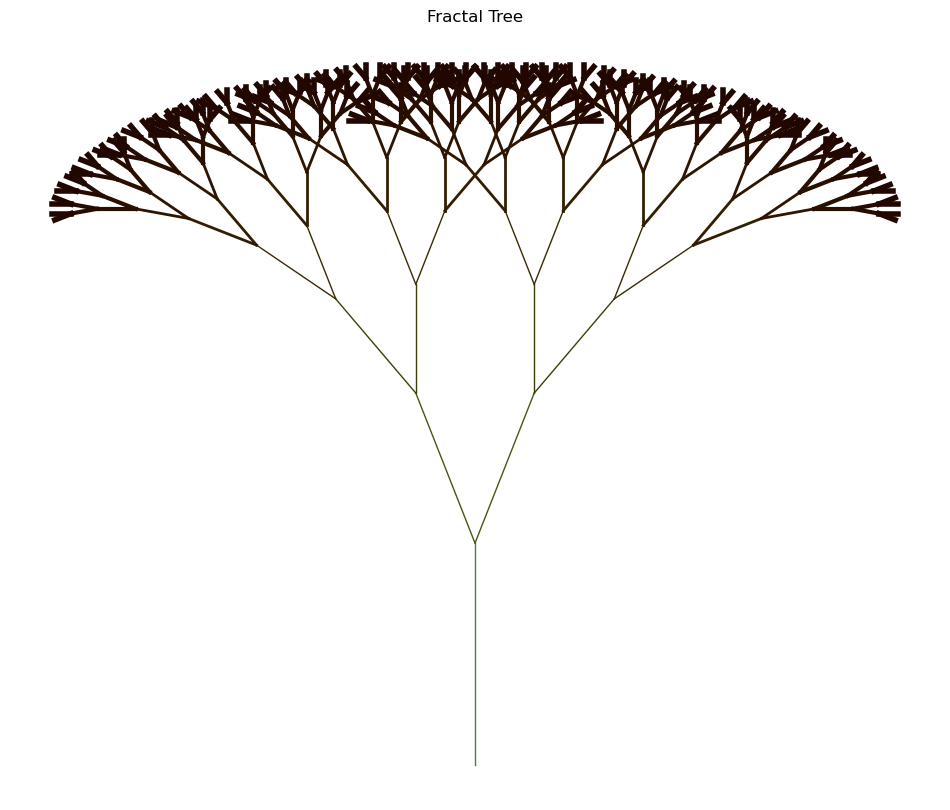

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Fractal Tree parameters
angle_variation = 15  # Base angle for branching
length_ratio = 0.7  # How much each branch shortens
min_length = 5  # Minimum branch length to stop recursion
max_depth = 12  # Maximum recursion depth

# Function to draw the tree
def draw_tree(x, y, length, angle, depth, color):
    if depth > max_depth or length < min_length:
        return
    
    # Calculate the end point of the current branch
    rad = np.radians(angle)
    x_end = x + length * np.cos(rad)
    y_end = y + length * np.sin(rad)
    
    # Draw the branch
    plt.plot([x, x_end], [y, y_end], color=color, linewidth=max(1, depth // 2))
    
    # Next branch parameters
    new_color = (color[0] * 0.9, color[1] * 0.7, color[2] * 0.4)
    next_length = length * length_ratio
    next_depth = depth + 1
    
    # Recursive branching (left and right)
    draw_tree(x_end, y_end, next_length, angle - angle_variation, next_depth, new_color)
    draw_tree(x_end, y_end, next_length, angle + angle_variation, next_depth, new_color)

# Plot the tree
plt.figure(figsize=(12, 10))
plt.title('Fractal Tree')
plt.axis('off')

# Initial tree trunk
draw_tree(0, -100, 120, 90, 0, (0.3, 0.5, 0.2))
plt.show()

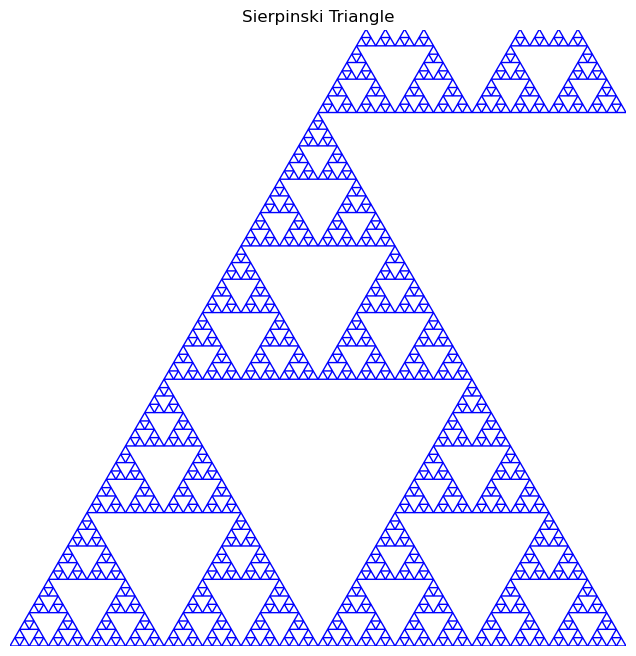

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(ax, vertices, depth, color='black'):
    if depth == 0:
        triangle = plt.Polygon(vertices, edgecolor=color, facecolor='none')
        ax.add_patch(triangle)
    else:
        # Calculate midpoints of each edge
        midpoints = [
            (vertices[i] + vertices[(i+1) % 3]) / 2 for i in range(3)
        ]
        # Draw 3 smaller triangles recursively
        for i in range(3):
            sierpinski_triangle(
                ax, [vertices[i], midpoints[i], midpoints[(i+2) % 3]], depth-1, color
            )

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Define the initial triangle vertices
vertices = np.array([[0, 0], [1, np.sqrt(3)], [2, 0]])
depth = 7  # Adjust depth as needed

sierpinski_triangle(ax, vertices, depth, color='blue')
plt.title("Sierpinski Triangle")
plt.show()

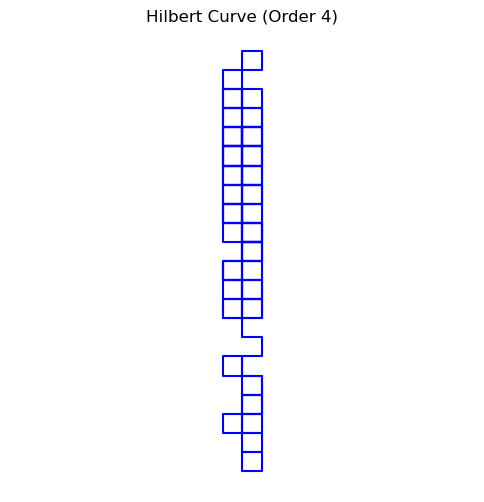

In [3]:
import matplotlib.pyplot as plt

def hilbert_curve(n, angle=90):
    """Generate Hilbert curve points of order n."""
    path = []
    
    def hilbert(level, angle, step, sign=1):
        nonlocal path
        if level == 0:
            return
        angle *= sign
        hilbert(level - 1, -angle, step, -sign)
        path.append(angle)
        hilbert(level - 1, angle, step, sign)
        path.append(angle)
        hilbert(level - 1, angle, step, sign)
        path.append(-angle)
        hilbert(level - 1, -angle, step, -sign)

    # Generate angles
    hilbert(n, angle, 1)

    # Convert angle path to coordinates
    x, y = [0], [0]
    direction = 0  # Start facing "right"
    for a in path:
        direction = (direction + a) % 360
        if direction == 0:
            x.append(x[-1] + 1)
            y.append(y[-1])
        elif direction == 90:
            x.append(x[-1])
            y.append(y[-1] + 1)
        elif direction == 180:
            x.append(x[-1] - 1)
            y.append(y[-1])
        elif direction == 270:
            x.append(x[-1])
            y.append(y[-1] - 1)

    return x, y

# Plotting
order = 4  # Try 1 to 5
x, y = hilbert_curve(order)

plt.figure(figsize=(6, 6))
plt.plot(x, y, color='blue')
plt.title(f'Hilbert Curve (Order {order})')
plt.axis('equal')
plt.axis('off')
plt.show()

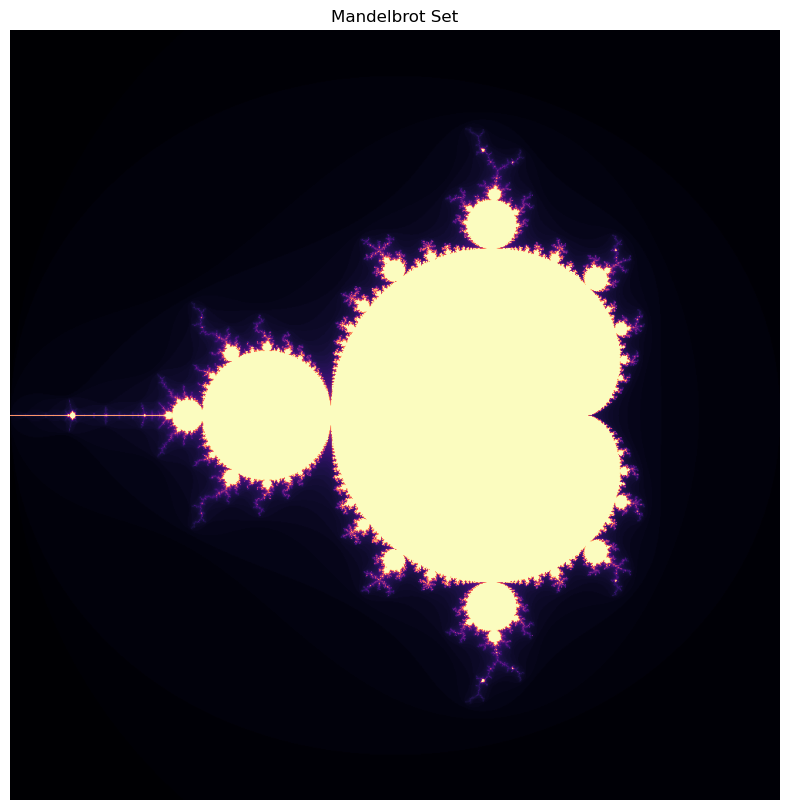

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Mandelbrot settings
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Generate fractal image
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    image = np.zeros((height, width))
    for x in range(width):
        for y in range(height):
            re = xmin + (x / width) * (xmax - xmin)
            im = ymin + (y / height) * (ymax - ymin)
            c = complex(re, im)
            image[y, x] = mandelbrot(c, max_iter)
    return image

# Plot it
plt.figure(figsize=(10, 10))
mandelbrot_img = mandelbrot_set(-2.0, 1.0, -1.5, 1.5, 1000, 1000, 100)
plt.imshow(mandelbrot_img, extent=(-2, 1, -1.5, 1.5), cmap='magma')
plt.title("Mandelbrot Set")
plt.axis('off')
plt.show()

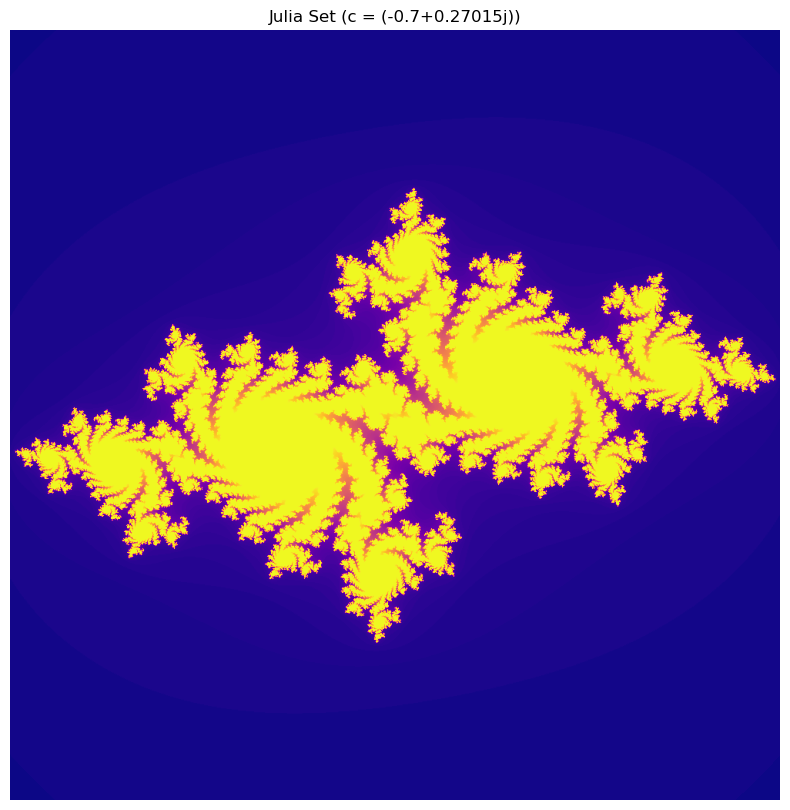

In [5]:
 # Julia settings
def julia(z, c, max_iter):
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Generate Julia set image
def julia_set(c, xmin, xmax, ymin, ymax, width, height, max_iter):
    image = np.zeros((height, width))
    for x in range(width):
        for y in range(height):
            re = xmin + (x / width) * (xmax - xmin)
            im = ymin + (y / height) * (ymax - ymin)
            z = complex(re, im)
            image[y, x] = julia(z, c, max_iter)
    return image

# Choose a complex number c for Julia
c = complex(-0.7, 0.27015)

# Plot it
plt.figure(figsize=(10, 10))
julia_img = julia_set(c, -1.5, 1.5, -1.5, 1.5, 1000, 1000, 100)
plt.imshow(julia_img, extent=(-1.5, 1.5, -1.5, 1.5), cmap='plasma')
plt.title(f"Julia Set (c = {c})")
plt.axis('off')
plt.show()

In [9]:
import turtle

# L-System configuration for a Fractal Plant
axiom = "X"
rules = {
    "X": "F+[[X]-X]-F[-FX]+X",
    "F": "FF"
}
iterations = 5
angle = 25
length = 5

# Generate L-system string
def generate_l_system(axiom, rules, iterations):
    result = axiom
    for _ in range(iterations):
        result = "".join(rules.get(c, c) for c in result)
    return result

# Draw with turtle
def draw_l_system(instructions, angle, length):
    stack = []
    for cmd in instructions:
        if cmd == "F":
            turtle.forward(length)
        elif cmd == "+":
            turtle.right(angle)
        elif cmd == "-":
            turtle.left(angle)
        elif cmd == "[":
            stack.append((turtle.position(), turtle.heading()))
        elif cmd == "]":
            position, heading = stack.pop()
            turtle.penup()
            turtle.goto(position)
            turtle.setheading(heading)
            turtle.pendown()

# Setup turtle
turtle.speed(0)
turtle.left(90)
turtle.penup()
turtle.goto(0, -300)
turtle.pendown()

# Generate and draw
instructions = generate_l_system(axiom, rules, iterations)
draw_l_system(instructions, angle, length)

turtle.done()

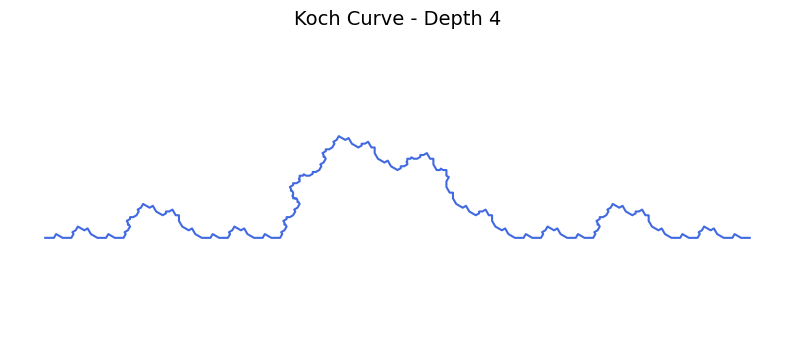

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def koch_curve(p1, p2, depth):
    if depth == 0:
        return [p1, p2]
    
    # Compute the points dividing the line into three equal segments
    p1 = np.array(p1)
    p2 = np.array(p2)
    one_third = p1 + (p2 - p1) / 3
    two_third = p1 + 2 * (p2 - p1) / 3

    # Compute the peak point of the equilateral triangle
    angle = np.pi / 3  # 60 degrees
    direction = two_third - one_third
    rotation = np.array([[np.cos(angle), -np.sin(angle)],
                         [np.sin(angle),  np.cos(angle)]])
    peak = one_third + rotation @ direction / 2

    # Recursively apply Koch to 4 segments
    segment1 = koch_curve(p1, one_third, depth - 1)
    segment2 = koch_curve(one_third, peak, depth - 1)
    segment3 = koch_curve(peak, two_third, depth - 1)
    segment4 = koch_curve(two_third, p2, depth - 1)

    return segment1[:-1] + segment2[:-1] + segment3[:-1] + segment4
    
def plot_koch(depth=3):
    start = (0, 0)
    end = (1, 0)

    points = koch_curve(start, end, depth)
    x, y = zip(*points)
    
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, color='royalblue')
    plt.title(f'Koch Curve - Depth {depth}', fontsize=14)
    plt.axis('equal')
    plt.axis('off')
    plt.show()

plot_koch(depth=4)  # Try depth from 0 to 5